# 3REQ system

Requirement analysis system.

The flow is presented in the following figure: 

<img src="flow.png" alt="drawing" width="700"/>

Summary:
1. Extract sections that contain words like "latency"
2. Find if they resemble requirements or not
3. Check if they are specific kinds of requirements (like signalling)
4. Write new requirements based on the text in these sections. 

In [1]:
from docx2python import docx2python
import os

import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer

from tqdm import tqdm

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Step 1: List the documents's sections with "latency"

In the first step, we go through the documents in the folder "input_standards" and we extract which sections of these documents contain th word "latency". We store the results in a dictionary.

In [4]:
def extractLatencySections(doc):
    strSectionTitle = ""
    dictSections = {}
    listLatency = []
    skippedSections = 0

    doc_result = docx2python(doc,paragraph_styles = True, html=True)

    # we iterate over all lines
    # look for the section titles (which have the tag <h1>, <h2>, <h3>, etc.)
    # then we add the content of each section to the dictionary
    # and if there is a word "latency" somewhere in the section, we add the section title to the listLatency
    for oneLine in tqdm(doc_result.text.split('\n')):
        if "<h" in oneLine:
            strSectionTitle = oneLine
            dictSections[strSectionTitle] = []

        if strSectionTitle != "":  
            dictSections[strSectionTitle].append(oneLine)

        keywordsInLine = ["latency", "latencies", "delay"]
        keywordsInSections = ["references", "introduction", "definition"]

        if any(word in oneLine.lower() for word in keywordsInLine) and not any(word in strSectionTitle.lower() for word in keywordsInSections): 
            listLatency.append(strSectionTitle)
        else:
            skippedSections += 1

            
    # remove the keys from the dictionary if they are not part of the listLatency
    # as we want to get only the relevant sections, i.e., the one with the word latency
    for key in list(dictSections.keys()):
        if key not in listLatency:
            del dictSections[key]

    # print("Skipped sections: ", skippedSections)

    # return the dictionary with the relevant sections
    return dictSections


In [5]:
docInputFolder = "./input_standards"

# this is the return list of all the lines in the document
lstAllLines = []

# for each .docx file in the input folder
# extract the sections with latency using the extractLatencySections function
# and print the sections
for doc in tqdm(os.listdir(docInputFolder)):    

    if doc.endswith(".docx"):
        #print(f"Processing {doc}")

        # since things can go wrong with the latency library, 
        # we use a try except block to avoid the program to stop
        try: 
            dictSections = extractLatencySections(os.path.join(docInputFolder, doc))
        
            # we list the content
            # as a long list of sections 
            for key in dictSections:

                lstOneLine = [key, doc]

                for line in dictSections[key]:
                    lstOneLine.append(line)
                    
                lstAllLines.append(lstOneLine)

        except Exception as e:
            print(f"Error with {doc}: {e}")

  1%|          | 1/97 [00:01<02:46,  1.73s/it]

Skipped sections:  13952


  2%|▏         | 2/97 [00:02<02:00,  1.27s/it]

Skipped sections:  8157


  3%|▎         | 3/97 [00:03<01:57,  1.25s/it]

Skipped sections:  8175


  4%|▍         | 4/97 [00:04<01:31,  1.02it/s]

Skipped sections:  2001


  5%|▌         | 5/97 [00:06<01:56,  1.26s/it]

Skipped sections:  17829


  7%|▋         | 7/97 [00:08<01:40,  1.11s/it]

Skipped sections:  16593


  8%|▊         | 8/97 [00:09<01:54,  1.29s/it]

Skipped sections:  16649


  9%|▉         | 9/97 [00:12<02:15,  1.54s/it]

Skipped sections:  16665


 10%|█         | 10/97 [00:12<01:47,  1.24s/it]

Skipped sections:  3862


 11%|█▏        | 11/97 [00:13<01:31,  1.07s/it]

Skipped sections:  4047


 13%|█▎        | 13/97 [00:15<01:35,  1.13s/it]

Skipped sections:  15388


 14%|█▍        | 14/97 [00:16<01:32,  1.11s/it]

Skipped sections:  7526


 16%|█▋        | 16/97 [00:17<01:05,  1.25it/s]

Skipped sections:  4133


 18%|█▊        | 17/97 [00:18<01:10,  1.13it/s]

Skipped sections:  8890


 19%|█▊        | 18/97 [00:20<01:37,  1.24s/it]

Skipped sections:  21857


 20%|█▉        | 19/97 [00:22<01:50,  1.42s/it]

Skipped sections:  14776


 21%|██        | 20/97 [00:24<02:02,  1.59s/it]

Skipped sections:  21671


 22%|██▏       | 21/97 [00:26<01:58,  1.56s/it]

Skipped sections:  9754


 24%|██▎       | 23/97 [00:27<01:14,  1.01s/it]

Skipped sections:  4205


 25%|██▍       | 24/97 [00:29<01:43,  1.42s/it]

Skipped sections:  23273


 26%|██▌       | 25/97 [00:30<01:25,  1.19s/it]

Skipped sections:  5609


 27%|██▋       | 26/97 [00:31<01:25,  1.21s/it]

Skipped sections:  7973


 28%|██▊       | 27/97 [00:32<01:17,  1.11s/it]

Skipped sections:  5327


 29%|██▉       | 28/97 [00:34<01:31,  1.32s/it]

Skipped sections:  19891


 30%|██▉       | 29/97 [00:36<01:56,  1.71s/it]

Skipped sections:  24090


 31%|███       | 30/97 [00:38<02:01,  1.81s/it]

Skipped sections:  10420


 32%|███▏      | 31/97 [00:39<01:33,  1.41s/it]

Skipped sections:  4434


 33%|███▎      | 32/97 [00:41<01:52,  1.73s/it]

Skipped sections:  18081


 34%|███▍      | 33/97 [00:43<01:39,  1.55s/it]

Skipped sections:  8457


 35%|███▌      | 34/97 [00:43<01:16,  1.22s/it]

Skipped sections:  4406


 36%|███▌      | 35/97 [00:49<02:41,  2.60s/it]

Skipped sections:  64435


 37%|███▋      | 36/97 [00:55<03:42,  3.65s/it]

Skipped sections:  70130


 38%|███▊      | 37/97 [00:56<03:00,  3.00s/it]

Skipped sections:  17841


 39%|███▉      | 38/97 [00:57<02:15,  2.30s/it]

Skipped sections:  2418


 40%|████      | 39/97 [00:57<01:38,  1.69s/it]

Skipped sections:  1933


 41%|████      | 40/97 [00:58<01:25,  1.49s/it]

Skipped sections:  7280


 42%|████▏     | 41/97 [00:59<01:12,  1.29s/it]

Skipped sections:  3803


 43%|████▎     | 42/97 [01:00<01:03,  1.16s/it]

Skipped sections:  8364


 44%|████▍     | 43/97 [01:01<01:01,  1.13s/it]

Skipped sections:  8380


 45%|████▌     | 44/97 [01:04<01:30,  1.70s/it]

Skipped sections:  21726


 46%|████▋     | 45/97 [01:05<01:09,  1.33s/it]

Skipped sections:  1883


 47%|████▋     | 46/97 [01:06<01:11,  1.40s/it]

Skipped sections:  2947


 48%|████▊     | 47/97 [01:07<01:04,  1.29s/it]

Skipped sections:  8660


 49%|████▉     | 48/97 [01:08<00:54,  1.12s/it]

Skipped sections:  3506


 51%|█████     | 49/97 [01:09<00:56,  1.18s/it]

Skipped sections:  7161


 52%|█████▏    | 50/97 [01:10<00:52,  1.12s/it]

Skipped sections:  3300


 53%|█████▎    | 51/97 [01:11<00:40,  1.15it/s]

Skipped sections:  2047


 54%|█████▎    | 52/97 [01:12<00:41,  1.09it/s]

Skipped sections:  4282


 55%|█████▍    | 53/97 [01:12<00:34,  1.27it/s]

Skipped sections:  1507


 56%|█████▌    | 54/97 [01:13<00:33,  1.27it/s]

Skipped sections:  5242


 57%|█████▋    | 55/97 [01:14<00:38,  1.10it/s]

Skipped sections:  7356


 60%|█████▉    | 58/97 [01:14<00:17,  2.24it/s]

Skipped sections:  2577


 61%|██████    | 59/97 [01:15<00:22,  1.68it/s]

Skipped sections:  6948


 62%|██████▏   | 60/97 [01:16<00:21,  1.74it/s]

Skipped sections:  1980


 63%|██████▎   | 61/97 [01:17<00:23,  1.54it/s]

Skipped sections:  5635


 64%|██████▍   | 62/97 [01:18<00:28,  1.25it/s]

Skipped sections:  8367


 65%|██████▍   | 63/97 [01:19<00:28,  1.20it/s]

Skipped sections:  4105


 66%|██████▌   | 64/97 [01:19<00:21,  1.54it/s]

Skipped sections:  1720


 67%|██████▋   | 65/97 [01:20<00:19,  1.65it/s]

Skipped sections:  1613


 68%|██████▊   | 66/97 [01:22<00:30,  1.00it/s]

Skipped sections:  12177


 69%|██████▉   | 67/97 [01:23<00:33,  1.10s/it]

Skipped sections:  1085


 70%|███████   | 68/97 [01:24<00:28,  1.01it/s]

Skipped sections:  3777


 72%|███████▏  | 70/97 [01:24<00:16,  1.68it/s]

Skipped sections:  1640


 73%|███████▎  | 71/97 [01:25<00:19,  1.35it/s]

Skipped sections:  7304


 74%|███████▍  | 72/97 [01:26<00:18,  1.33it/s]

Skipped sections:  4498


 75%|███████▌  | 73/97 [01:26<00:14,  1.61it/s]

Skipped sections:  2440


 76%|███████▋  | 74/97 [01:27<00:14,  1.60it/s]

Skipped sections:  4663


 77%|███████▋  | 75/97 [01:27<00:11,  1.92it/s]

Skipped sections:  2135


 78%|███████▊  | 76/97 [01:29<00:19,  1.07it/s]

Skipped sections:  8685


 79%|███████▉  | 77/97 [01:31<00:25,  1.25s/it]

Skipped sections:  14018


 80%|████████  | 78/97 [01:33<00:25,  1.35s/it]

Skipped sections:  6560


 81%|████████▏ | 79/97 [01:35<00:29,  1.61s/it]

Skipped sections:  8299


 84%|████████▎ | 81/97 [01:37<00:21,  1.35s/it]

Skipped sections:  8483


 85%|████████▍ | 82/97 [01:37<00:17,  1.14s/it]

Skipped sections:  1544


 86%|████████▌ | 83/97 [01:38<00:12,  1.09it/s]

Skipped sections:  2591


 87%|████████▋ | 84/97 [01:38<00:10,  1.27it/s]

Skipped sections:  1493


 88%|████████▊ | 85/97 [01:39<00:08,  1.44it/s]

Skipped sections:  1810


 89%|████████▊ | 86/97 [01:40<00:09,  1.20it/s]

Skipped sections:  1859


 90%|████████▉ | 87/97 [01:43<00:15,  1.50s/it]

Skipped sections:  14868


 91%|█████████ | 88/97 [01:44<00:11,  1.30s/it]

Skipped sections:  4362


 92%|█████████▏| 89/97 [01:45<00:11,  1.44s/it]

Skipped sections:  8177


 98%|█████████▊| 95/97 [01:46<00:01,  1.90it/s]

Skipped sections:  5564


 99%|█████████▉| 96/97 [01:47<00:00,  1.68it/s]

Skipped sections:  7919


100%|██████████| 97/97 [01:48<00:00,  1.12s/it]

Skipped sections:  1711


In [6]:
from tqdm import tqdm

model = SentenceTransformer("all-MiniLM-L6-v2")

# list with all embeddings for the sections
lstEmbeddings = []
iCounter = 0

for oneLine in tqdm(lstAllLines):

    # the content of the section starts on the third position of the list
    sentences = oneLine[3:]

    # Sentences are encoded by calling model.encode()
    embeddings = model.encode(sentences)
    
    # Print the average embeddings for all the sentences 
    # in this section
    avg_embedding = np.mean(embeddings, axis=0)
    
    lstOneLine = [oneLine[0], oneLine[1], 2, str(sentences).replace("$", "_").replace("\n", "_"), avg_embedding]

    lstEmbeddings.append(lstOneLine)

    iCounter += 1
    # the code below is for debug only
    # in case we want to stop the loop after a certain number of iterations
    #if iCounter == 100:
    #    break

100%|██████████| 873/873 [01:03<00:00, 13.75it/s]


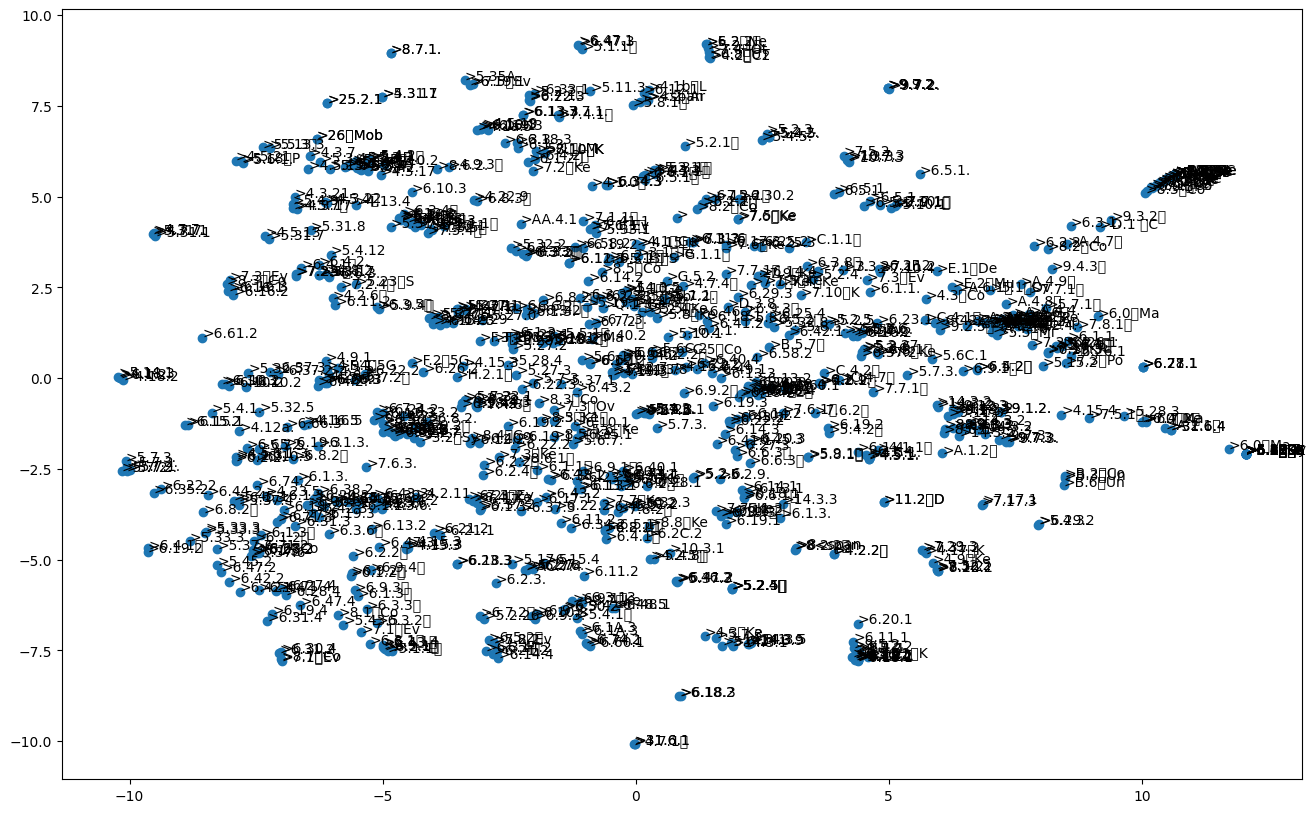

In [7]:
# let's plot these average embeddings using t-SNE

# we create a list with the embeddings
lstEmbeddingsNP = np.array([x[4] for x in lstEmbeddings])

# we use t-SNE to reduce the dimensionality of the embeddings
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(lstEmbeddingsNP)

# we plot the t-SNE results
plt.figure(figsize=(16,10))

plt.scatter(tsne_results[:,0], tsne_results[:,1])

# Add labels to each dot
for i, label in enumerate([x[0] for x in lstEmbeddings]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], label[3:10])


plt.show()

## Step 2: Find the relevant sections

In this step, we take the sections identified in Step 1 and we compare them to a list of right and wrong requirements. The list is stored in the file List.xlsx

In [8]:
# open the file List.xlsx using pandas
# and read the workshop NR
df = pd.read_excel("List.xlsx", sheet_name="R_NR")

# convert the dataframe to a list of lists
lstReference = df.values.tolist()

lstReference[0]

['The 5G system shall support an end-to-end latency of less than 5 ms or 10 ms, as requested by the UE initiating the communication.',
 1]

In [9]:
# list with all embeddings for the sections
lstEmbeddingsRef = []

for oneLine in tqdm(lstReference):

    # the content of the section starts on the third position of the list
    sentences = oneLine[0]

    # Sentences are encoded by calling model.encode()
    embeddings = model.encode(sentences)
    
    # Print the average embeddings for all the sentences 
    # in this section
    avg_embedding = embeddings
    
    lstOneLine = [oneLine[0], 'REF', oneLine[1], oneLine[1], avg_embedding]

    lstEmbeddingsRef.append(lstOneLine)

100%|██████████| 19/19 [00:00<00:00, 133.81it/s]


In [10]:
# concatenate the two lists
lstEmbeddingsAll = lstEmbeddings + lstEmbeddingsRef

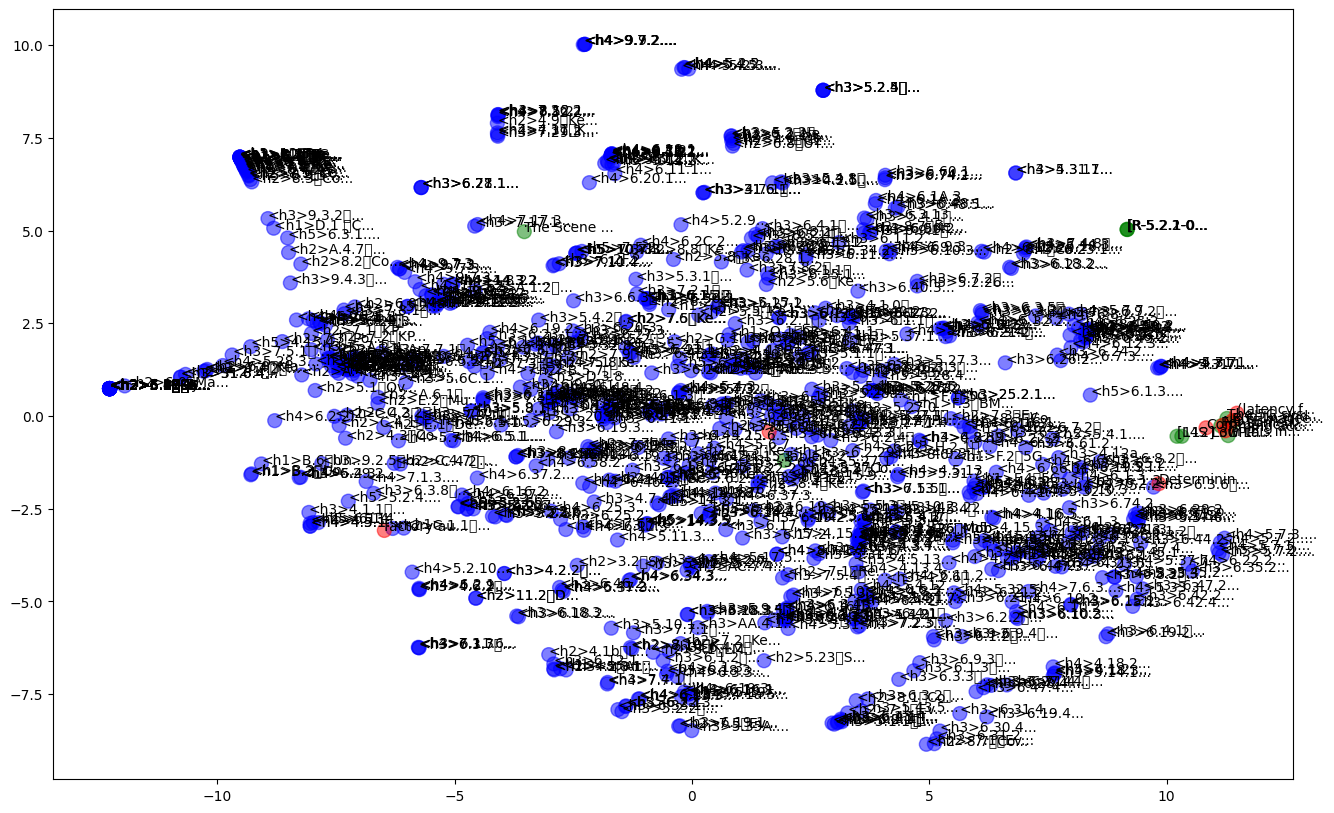

In [11]:
# let's plot these average embeddings using t-SNE

# we create a list with the embeddings
lstEmbeddingsNP = np.array([x[4] for x in lstEmbeddingsAll])

# we use t-SNE to reduce the dimensionality of the embeddings
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(lstEmbeddingsNP)

# Create a color map based on x[2]
color_map = {0: 'red', 1: 'green', 2: 'blue'}
colors = [color_map[x[2]] for x in lstEmbeddingsAll]

# we plot the t-SNE results
plt.figure(figsize=(16,10))

plt.scatter(tsne_results[:,0], tsne_results[:,1],c=colors, s=100, alpha=0.5)

# Add labels to each dot
for i, label in enumerate([x[0] for x in lstEmbeddingsAll]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], label[:10]+'...')


plt.show()

In [12]:
from sklearn.metrics.pairwise import euclidean_distances

# for each line in lstEmbeddings
# we calculate the euclidean distance with each line in lstEmbeddingsRef

lstDistPos = []
lstDistNeg = []

lstRelevant = []

for oneLine in tqdm(lstEmbeddings):    
    for oneLineRef in lstEmbeddingsRef:
        if oneLineRef[2] == 1:
            # euclidean distance between the two embeddings
            dist = euclidean_distances([oneLine[4]], [oneLineRef[4]])
            lstDistPos.append(dist[0][0])
        if oneLineRef[2] == 0:
            # euclidean distance between the two embeddings
            dist = euclidean_distances([oneLine[4]], [oneLineRef[4]])
            lstDistNeg.append(dist[0][0])
    
    # now calculate the average for both lists
    avgDistPos = np.mean(lstDistPos)
    avgDistNeg = np.mean(lstDistNeg)

    if avgDistPos < avgDistNeg:
        #print(f"Section {oneLine[0]} is relevant")
        # add the class to the list
        oneLine.append(1)
        lstRelevant.append(oneLine)
    else:
        #print(f"Section {oneLine[0]} is not relevant")
        # add the class to the list
        oneLine.append(0)

                

100%|██████████| 873/873 [00:02<00:00, 323.50it/s]


In [13]:
# here we save all the relevant sections to an Excel file
# and the non-relevant ones too
import pandas as pd

dfOutput = pd.DataFrame(lstEmbeddings, columns=["Section", "Document", "Class", "Content", "Embedding", "Relevance"])

dfOutput.to_excel("./output.xlsx", index=False)

## Step 3: Find which requirements are impacted

In this step, we compare the relevant sections with the existing requirements. Based on the distance, we can determine which requirements are impacted. The requirements are provided as a separete list. 

In [14]:
print(f'Percentage relevant: {len(lstRelevant)/len(lstEmbeddings)*100:.2f}%')

Percentage relevant: 100.00%


In [15]:
# read the requirements from the excel file requirements.xlsx, worksheet LR
df = pd.read_excel("List.xlsx", sheet_name="LR")

# convert to list
lstRequirements = df.values.tolist()
lstRequirements[0]

# now we calculate the embeddings for each of these requirements
lstEmbeddingsReq = []

for oneLine in tqdm(lstRequirements):
    
        # the content of the section starts on the third position of the list
        sentences = oneLine[1]
    
        # Sentences are encoded by calling model.encode()
        embeddings = model.encode(sentences)
        
        # Print the average embeddings for all the sentences 
        # in this section
        avg_embedding = embeddings
        
        lstOneLine = [oneLine[0], 'latency', oneLine[1], oneLine[1], avg_embedding]
    
        lstEmbeddingsReq.append(lstOneLine)

100%|██████████| 38/38 [00:00<00:00, 133.50it/s]


In [16]:
# now we calculate the euclidean distance between the requirements and the sections
# that are relevant
lstDist = []
lstRelevantDist = []

for oneLine in tqdm(lstRelevant):
    for oneLineReq in lstEmbeddingsReq:
        # euclidean distance between the two embeddings
        dist = euclidean_distances([oneLine[4]], [oneLineReq[4]])
        lstDist.append([oneLine[0], oneLine[1], oneLineReq[0], dist[0][0], oneLine[3]])

# now we sort the list by the distance
lstDist.sort(key=lambda x: x[2])

# and we print them
for i in range(len(lstDist)):
    print(f"Section {lstDist[i][0]} is close to requirement {lstDist[i][2]} with distance {lstDist[i][3]:.2f}")
    # add this to a list
    lstRelevantDist.append([lstDist[i][0], lstDist[i][1], lstDist[i][2], lstDist[i][3], lstDist[i][4]])

# save the list to an Excel file
dfOutput = pd.DataFrame(lstRelevantDist, columns=["Section", "Document", "Requirement", "Distance", "Content"])

# sort it by section and document
dfOutput = dfOutput.sort_values(by=["Section", "Document"])

dfOutput.to_excel("./output_requirements_distances_b.xlsx", index=False)

100%|██████████| 873/873 [00:05<00:00, 156.31it/s]


Section <h3>4.2.2	Mobile Terminated Short Message</h3> is close to requirement LR1_signalling with distance 1.10
Section <h3>5.2.4	Procedures in the SGSN</h3> is close to requirement LR1_signalling with distance 1.11
Section <h3>5.2.5	Procedures in the MME</h3> is close to requirement LR1_signalling with distance 1.08
Section <h3>25.2.1	General</h3> is close to requirement LR1_signalling with distance 1.06
Section <h1>26	Mobile terminated CS service delivery via an alternative MME in MME pool</h1> is close to requirement LR1_signalling with distance 1.03
Section <h3>31.6.1	General</h3> is close to requirement LR1_signalling with distance 1.09
Section <h3>31.6.4	Restoration of PFCP sessions associated with an FQ-CSID, Group ID or PGW-C/SMF IP Address</h3> is close to requirement LR1_signalling with distance 1.25
Section <h3>4.2.2	Mobile Terminated Short Message</h3> is close to requirement LR1_signalling with distance 1.10
Section <h3>5.2.4	Procedures in the SGSN</h3> is close to requir

In [17]:
# average the distance in dfOutput per section, document and requirement
dfOutput["Distance"] = dfOutput["Distance"].astype(float)
dfGrouped = dfOutput.groupby(["Section", "Document", "Requirement", "Content"])

#convert dfGrouped to a dataframe
dfGrouped = dfGrouped.agg({"Distance": "mean"}).reset_index()

dfGrouped.to_excel("./output_requirements_distances_g.xlsx", index=False)

In [18]:
# now check the minimum distance per section and document
dfGrouped = dfGrouped.sort_values(by=["Section", "Document", "Distance"])

dfGrouped = dfGrouped.groupby(["Section", "Document"]).first().reset_index()

dfGrouped.to_excel("./output_requirements_distances_g_min.xlsx", index=False)

In [19]:
# now we turn this into a list of lists
lstRelevantDist = dfGrouped.values.tolist()

print(len(lstRelevantDist))

873


## Step 4: create requirements based on each of these sections

In the last step, we create new requirements based on the sections identified in the previous steps.

In [21]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

modelInstr = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct", 
    device_map="cuda", 
    torch_dtype="auto", 
    trust_remote_code=True, 
)
tokenizerInstr = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.18k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [22]:
def createRequirement(content, type, model, tokenizer):
    
    strContent = f"Write the requirement in the following format 'The {type} of the system shall' {content}"

    messages = [
        {"role": "user", "content": strContent},
    ]

    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
    )

    generation_args = {
        "max_new_tokens": 500,
        "return_full_text": False,
        "temperature": 0.0,
        "do_sample": False,
    }

    output = pipe(messages, **generation_args)
    
    return output[0]['generated_text']

In [32]:
# for every requirement from the list, we generate a requirement
# and we add it to the list

lstGenerated = []
iCounter = 0

for oneLine in tqdm(lstRelevantDist):
    if (len(oneLine[3]) < 10000):
        strRequirement = createRequirement(oneLine[3], oneLine[1], modelInstr, tokenizerInstr)
        lstGenerated.append([oneLine[0], oneLine[1], oneLine[2], oneLine[3], oneLine[4], strRequirement])
    if iCounter == 10:
        # convert the list to a dataframe and save to excel
        dfOutput = pd.DataFrame(lstGenerated, columns=["Section", "Document", "Requirement type", "Content", "Distance", "Generated requirements"])
        dfOutput.to_excel("./output_requirements_generated.xlsx", index=False)

  0%|          | 0/873 [00:00<?, ?it/s]